# **Testing Out Different Import Methods**




*   **Kaggle API Imports**
*   **Collab File Imports**



In [2]:
import pandas as pd
import numpy as np

file = ('/content/walmart.csv')

df = pd.read_csv(file)


# We have columns and indexes (0,1,2,3..)

# **Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#Lets make sure we can see all the columns
pd.set_option('display.max_columns', 20)

In [ ]:
df.shape
# Lets look at the rows x columns (mxn)

# So we have 5.6 million rows, 10 columns


(550068, 10)

In [ ]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
# Lets see how many unique values are in each column
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


In [ ]:
df.dtypes  # Lets zoom in a little

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


## Data Desciption


*    **It looks like there are 3631 unique products across the 550K unique products**

*    **Cities have been masked into categories A, B, C - which would be useful if made more descriptive**

*    **Marital status is a bool**

*    **Occupation is described via a series of numbers rather than categories**

*    **Product categories are mased 1 - 12. Is it possible to determine what their true categories would be?**

*    **Ages are binned i.e. 0-17, 18-25, 26-35, 36-45, 46-50, 55+**

*    **Purchase amounts are the sum spent**




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# **Data Cleaning**

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [3]:
df = df.rename(columns= {'User_ID': 'UserID',
                    'Product_ID': 'ProductID',


                    'City_Category': 'City',
       'Stay_In_Current_City_Years': 'YearsOfResidence',
                    'Marital_Status':'MaritalStatus',
                    'Product_Category': 'ProductCategory',
                    'Purchase': 'ReceiptSum'})

In [ ]:
df.head()

,UserID,ProductID,Gender,Age,Occupation,City,YearsOfResidence,MaritalStatus,ProductCategory,ReceiptSum
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.loc[df.duplicated()]
# No EXACT duplicates

,UserID,ProductID,Gender,Age,Occupation,City,YearsOfResidence,MaritalStatus,ProductCategory,ReceiptSum


In [ ]:
# Lets check by a specific Feature

df.loc[df.duplicated(subset=['UserID'])]

,UserID,ProductID,Gender,Age,Occupation,City,YearsOfResidence,MaritalStatus,ProductCategory,ReceiptSum
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


________________________________________________________

In [ ]:
# Examining User ID behavior

df.query('UserID == 1000004')

,UserID,ProductID,Gender,Age,Occupation,City,YearsOfResidence,MaritalStatus,ProductCategory,ReceiptSum
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
39188,1000004,P00046742,M,46-50,7,B,2,1,1,15852
155580,1000004,P00329542,M,46-50,7,B,2,1,1,3849
194565,1000004,P00114942,M,46-50,7,B,2,1,1,19120
233733,1000004,P00025442,M,46-50,7,B,2,1,1,19693
272819,1000004,P00112542,M,46-50,7,B,2,1,1,15485
350810,1000004,P00112142,M,46-50,7,B,2,1,1,11765
390161,1000004,P00318742,M,46-50,7,B,2,1,1,15853


In [ ]:
df.loc[~df.duplicated(subset=['UserID','Age'])]  #.reset_index(drop=True) if you need to reset index plus drop previous index

,UserID,ProductID,Gender,Age,Occupation,City,YearsOfResidence,MaritalStatus,ProductCategory,ReceiptSum
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
...,...,...,...,...,...,...,...,...,...,...
185450,1004588,P00260042,F,26-35,4,C,0,0,5,8707
187076,1004871,P00242742,M,18-25,12,C,2,0,1,15389
221494,1004113,P00351842,M,36-45,17,C,3,0,5,5183
229480,1005391,P00339342,M,26-35,7,A,0,0,1,15831


# EDA

In [ ]:
df.columns

Index(['UserID', 'ProductID', 'Gender', 'Age', 'Occupation', 'City',
       'YearsOfResidence', 'MaritalStatus', 'ProductCategory', 'ReceiptSum',
       'ProductFrequency', 'UserFrequency'],
      dtype='object')

Age
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: proportion, dtype: float64


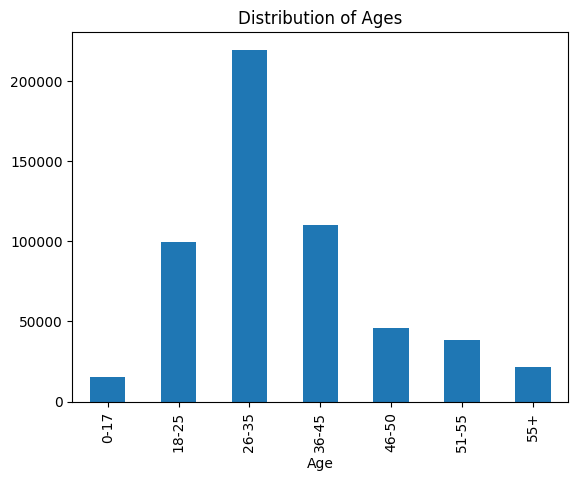

In [ ]:
df['Age'].value_counts().sort_index().plot(kind='bar', title = 'Distribution of Ages')

distribution = df['Age'].value_counts(normalize=True) * 100
print(distribution)

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64


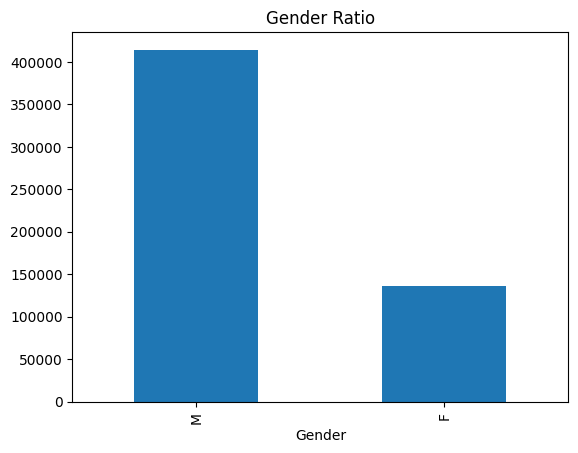

In [ ]:
ax =df['Gender'].value_counts().plot(kind='bar', title = 'Gender Ratio')
distribution = df['Gender'].value_counts(normalize=True) * 100
print(distribution)

<Axes: title={'center': 'Distribution of Product Categories'}, xlabel='ProductCategory'>

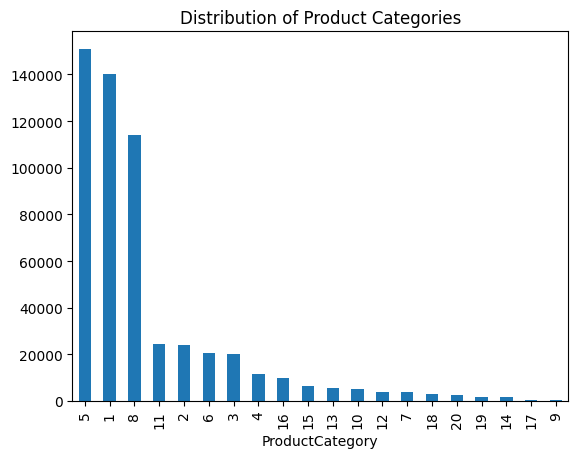

In [ ]:
df['ProductCategory'].value_counts().plot(kind='bar', title = 'Distribution of Product Categories')

#ax =df['ProductCategory'].value_counts().plot(kind='hist', bins = 20, title = 'Distribution of Product Categories')

#ax.set_xlabel("Product Category")

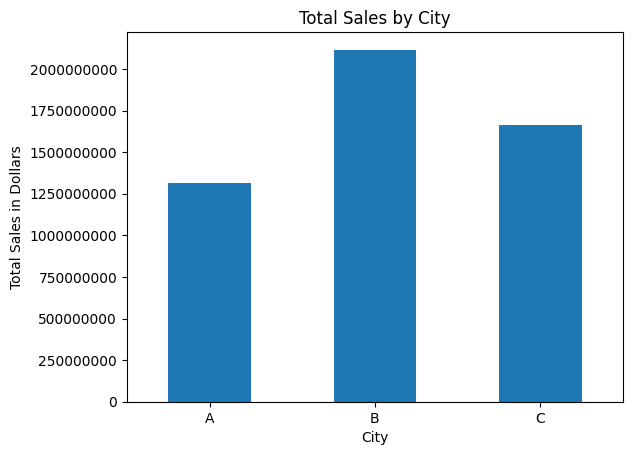

In [ ]:
df.groupby('City')['ReceiptSum'].sum().plot(kind='bar', title='Total Sales by City')
plt.ylabel('Total Sales in Dollars')
plt.xlabel('City')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.show()

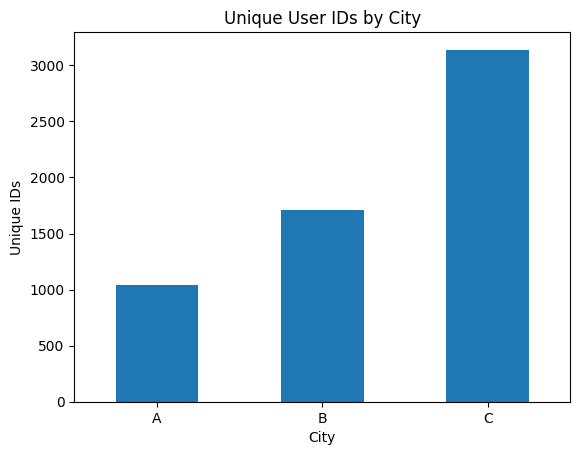

In [ ]:
df.groupby('City')['UserID'].nunique().plot(kind='bar', title='Unique User IDs by City')
plt.ylabel('Unique IDs')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.show()

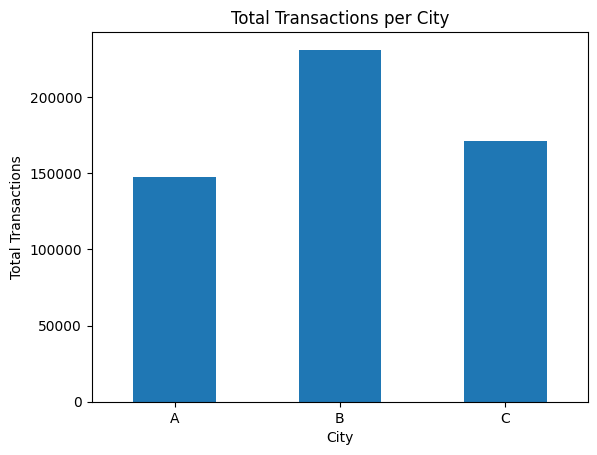

In [ ]:
df['City'].value_counts().sort_index().plot(kind='bar', title='Total Transactions per City')
plt.ylabel('Total Transactions')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.show()

In [ ]:
city_percentages = df['City'].value_counts(normalize=True).sort_index() * 100
print(city_percentages)

City
A    26.854862
B    42.026259
C    31.118880
Name: proportion, dtype: float64


In [4]:
totalcatsales = df['ProductCategory'].value_counts()
print(totalcatsales)

ProductCategory
5.0     7033
1.0     6343
8.0     5288
11.0    1175
2.0     1064
3.0      933
6.0      930
4.0      524
16.0     422
15.0     275
13.0     239
10.0     230
12.0     184
7.0      159
18.0     123
14.0      71
17.0      27
9.0       16
Name: count, dtype: int64


In [5]:
UniqProdsPerCategory = df.groupby('ProductCategory')['ProductID'].nunique().sort_values(ascending=False)
print(UniqProdsPerCategory)

ProductCategory
5.0     772
8.0     750
1.0     442
11.0    199
2.0     127
6.0      93
3.0      81
4.0      76
16.0     74
7.0      48
15.0     35
13.0     28
18.0     24
14.0     22
12.0     20
10.0     19
17.0      9
9.0       1
Name: ProductID, dtype: int64




# Univariate and Bivariate Analysis

Lets look at our data and try to find some outliers

Text(0, 0.5, 'Product ID')

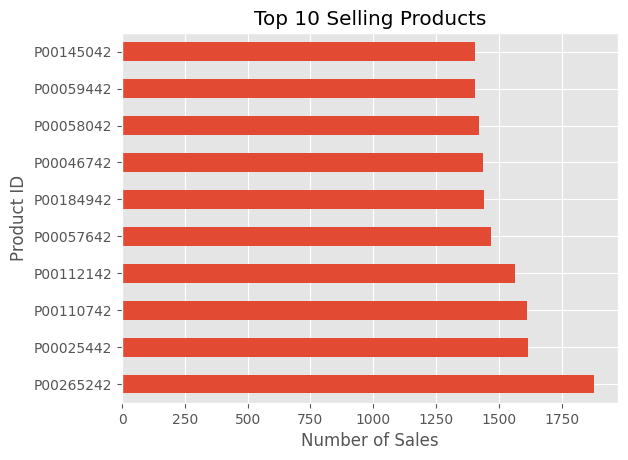

In [ ]:
#Top 10 Best Selling Products
ax = df['ProductID'].value_counts().head(10).plot(kind='barh', title = 'Top 10 Selling Products')
ax.set_xlabel('Number of Sales')
ax.set_ylabel('Product ID')


Text(0, 0.5, 'Product Category')

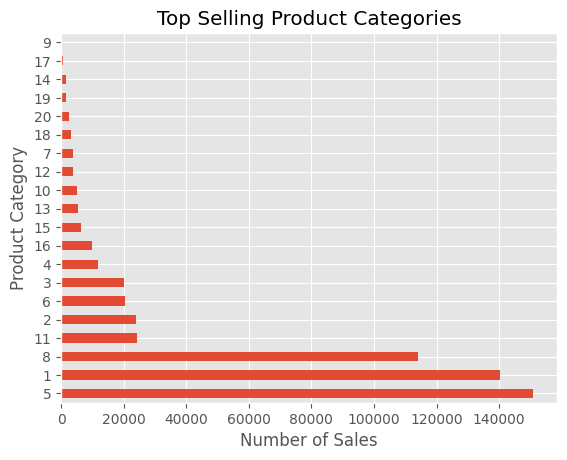

In [ ]:
#Top 10 Best Selling Products
ax = df['ProductCategory'].value_counts().head(20).plot(kind='barh', title = 'Top Selling Product Categories')
ax.set_xlabel('Number of Sales')
ax.set_ylabel('Product Category')

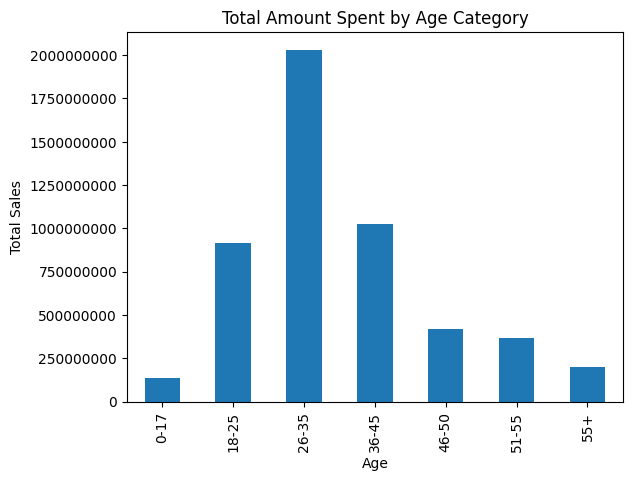

In [ ]:
import matplotlib.pyplot as plt

df.groupby('Age')['ReceiptSum'].sum().sort_index().plot(kind='bar', title='Total Amount Spent by Age Category')

plt.ylabel('Total Sales')
plt.xlabel('Age')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [ ]:
distribut = df.groupby('Age')['ReceiptSum'].sum() / df['ReceiptSum'].sum() * 100
print(distribut)

Age
0-17      2.647530
18-25    17.933325
26-35    39.871374
36-45    20.145361
46-50     8.258612
51-55     7.203947
55+       3.939850
Name: ReceiptSum, dtype: float64


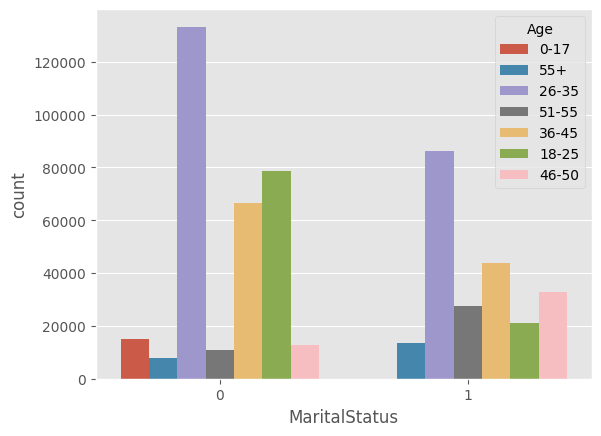

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='MaritalStatus', hue='Age', data=df)
plt.show()


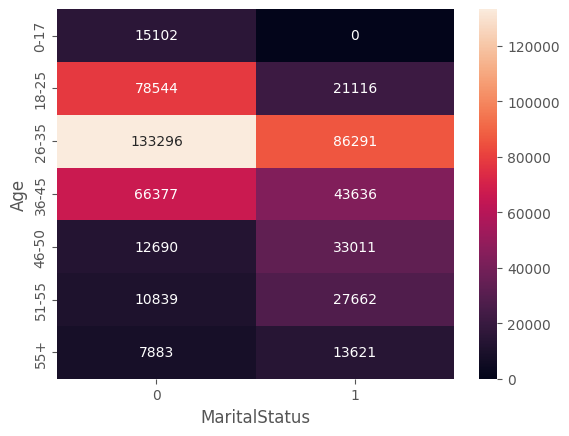

In [ ]:
pivot_table = df.pivot_table(index='Age', columns='MaritalStatus', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt="d")
plt.show()


____________________________________________________________

In [ ]:
df.columns

Index(['UserID', 'ProductID', 'Gender', 'Age', 'Occupation', 'City',
       'YearsOfResidence', 'MaritalStatus', 'ProductCategory', 'ReceiptSum',
       'ProductFrequency', 'UserFrequency'],
      dtype='object')

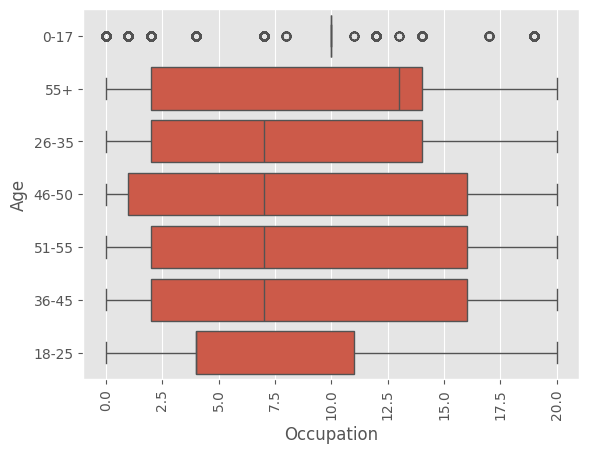

In [ ]:
sns.boxplot(x='Occupation', y='Age', data=df)
plt.xticks(rotation=90)  # Rotate x labels if needed
plt.show()


__________________________________________________________________________

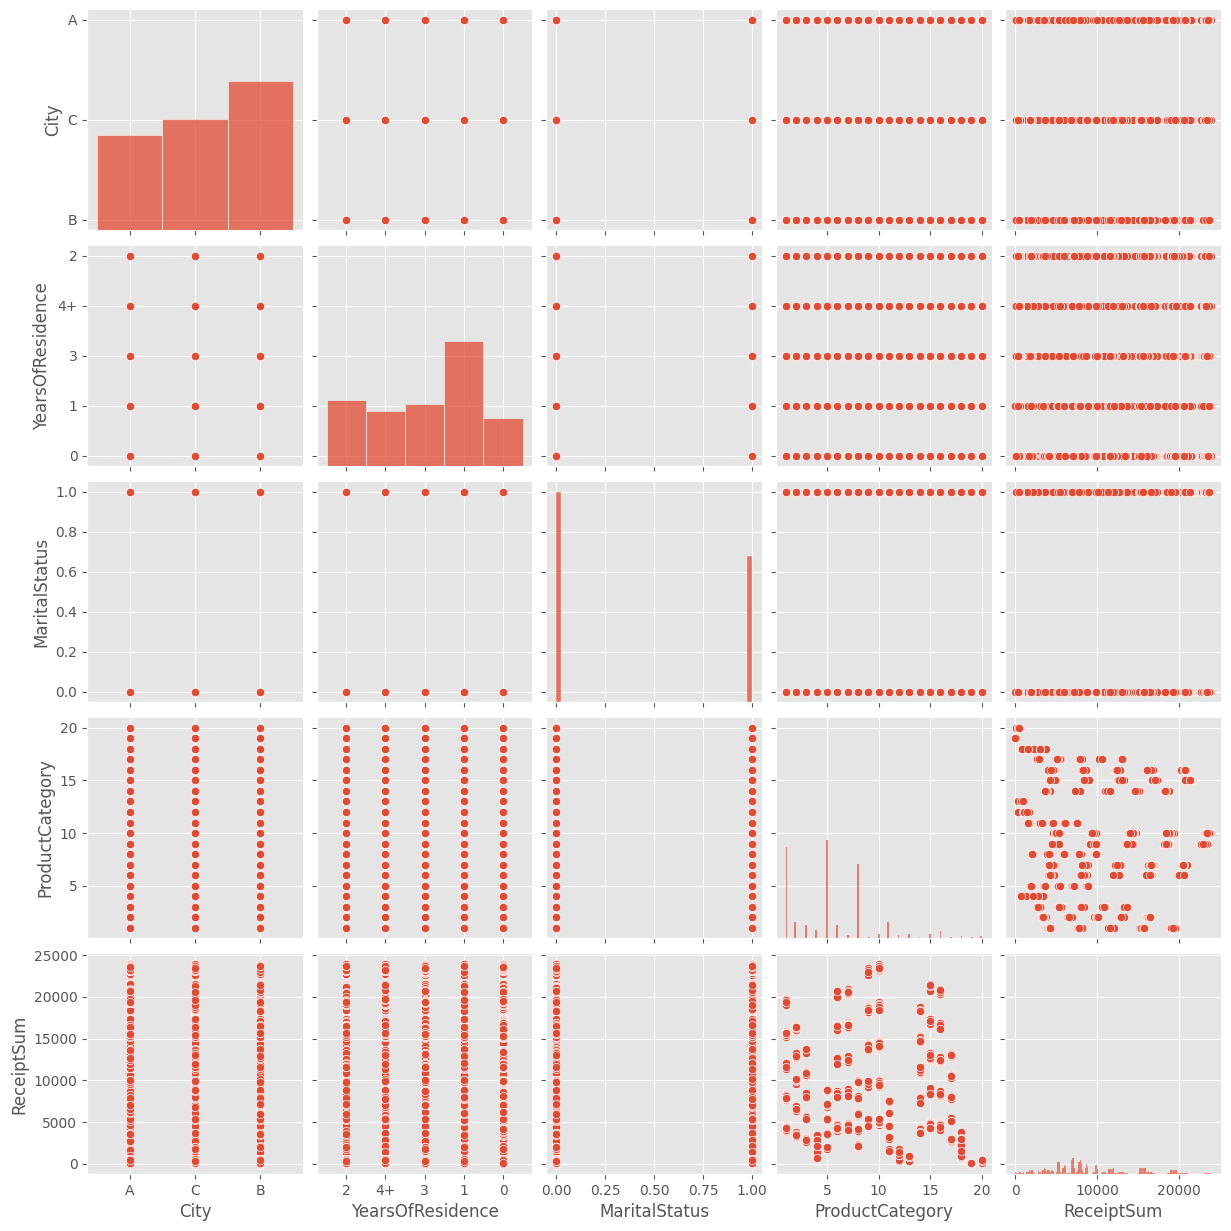

In [ ]:
sns.pairplot( df, vars =['City',
       'YearsOfResidence', 'MaritalStatus', 'ProductCategory', 'ReceiptSum'])

plt.show()

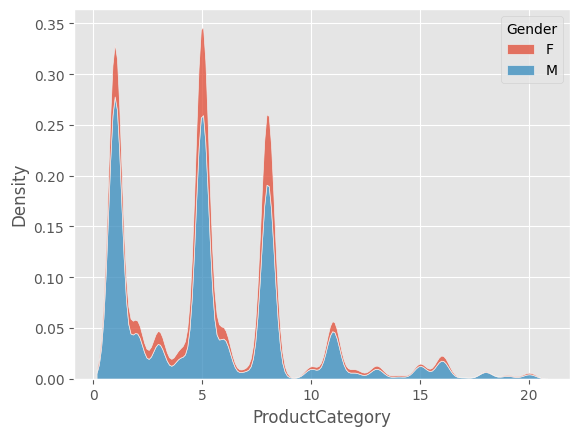

In [ ]:
sns.kdeplot( x='ProductCategory', multiple="stack", hue = 'Gender', data = df)

plt.show()

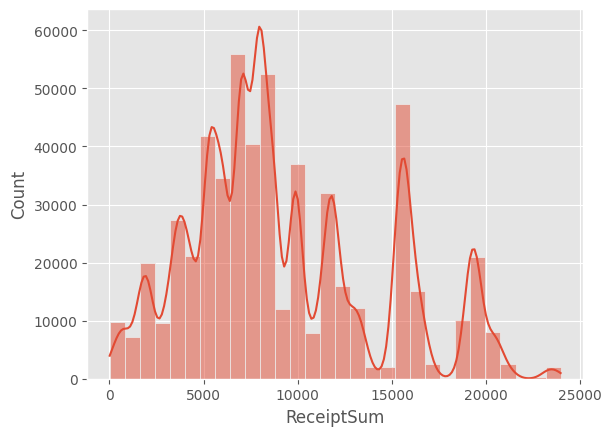

In [ ]:
sns.histplot(df['ReceiptSum'], bins=30, kde=True)
plt.show()


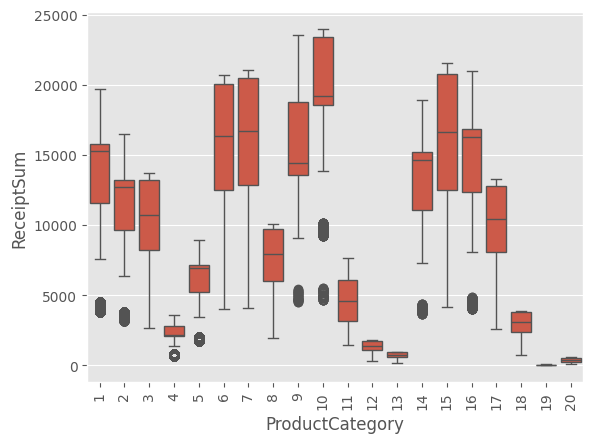

In [ ]:
sns.boxplot(x='ProductCategory', y='ReceiptSum', data=df)
plt.xticks(rotation=90)
plt.show()



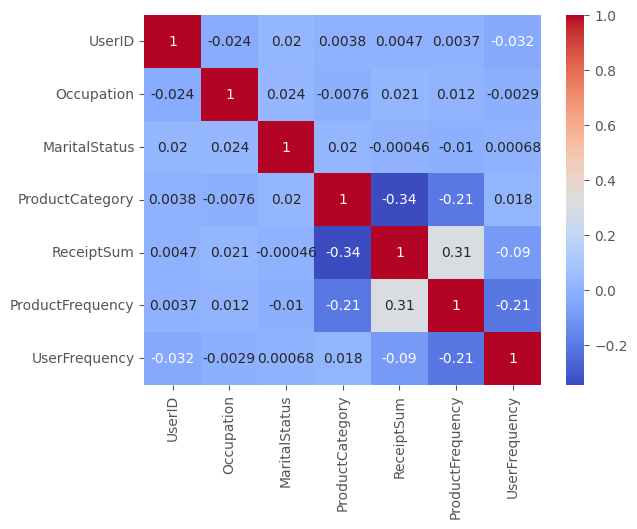

In [ ]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])
corr = numerical_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()



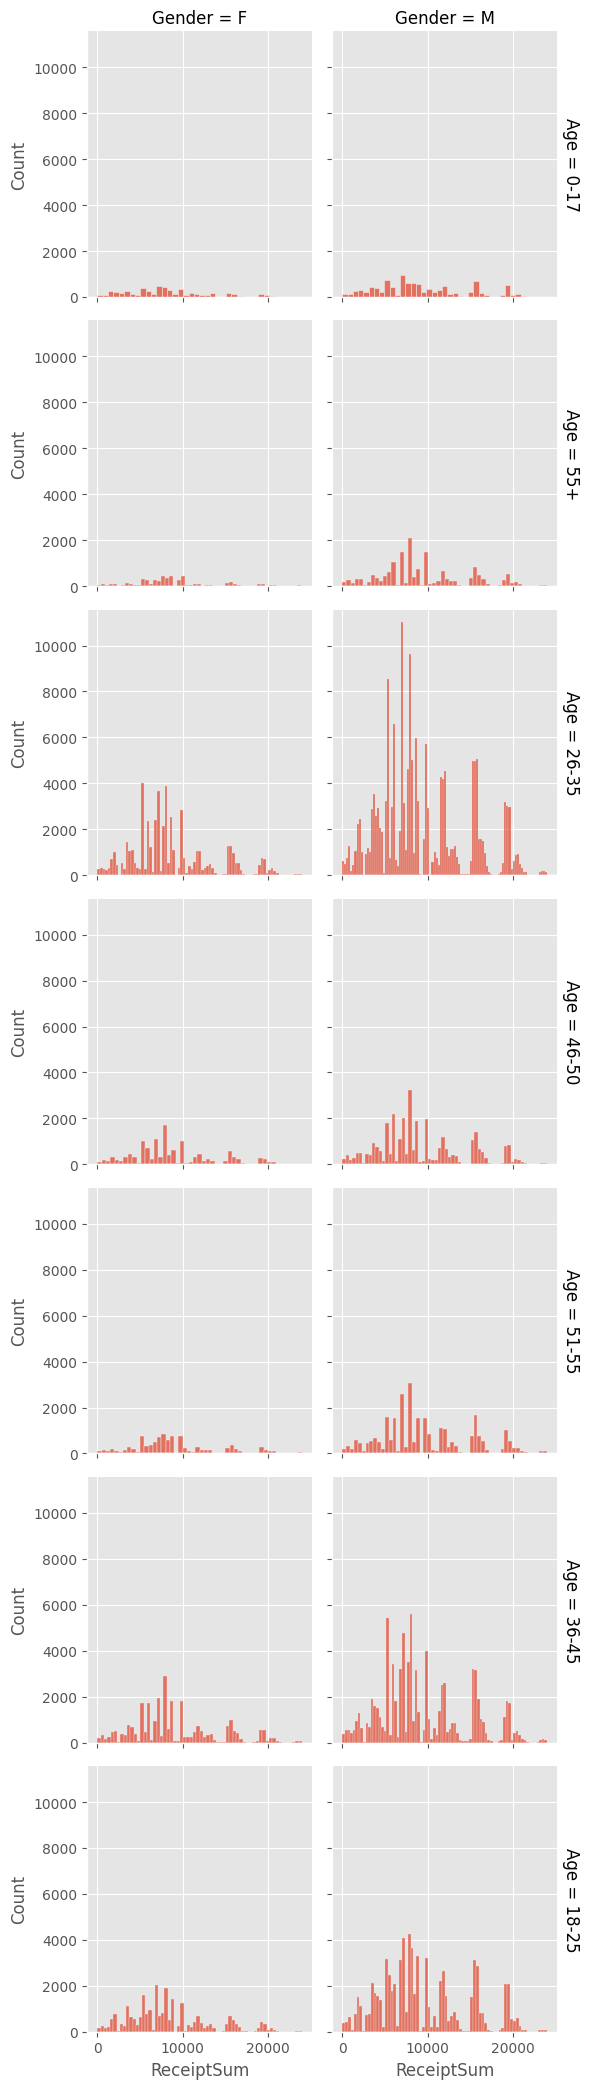

In [ ]:
g = sns.FacetGrid(df, col='Gender', row='Age', margin_titles=True)
g.map(sns.histplot, 'ReceiptSum')
plt.show()


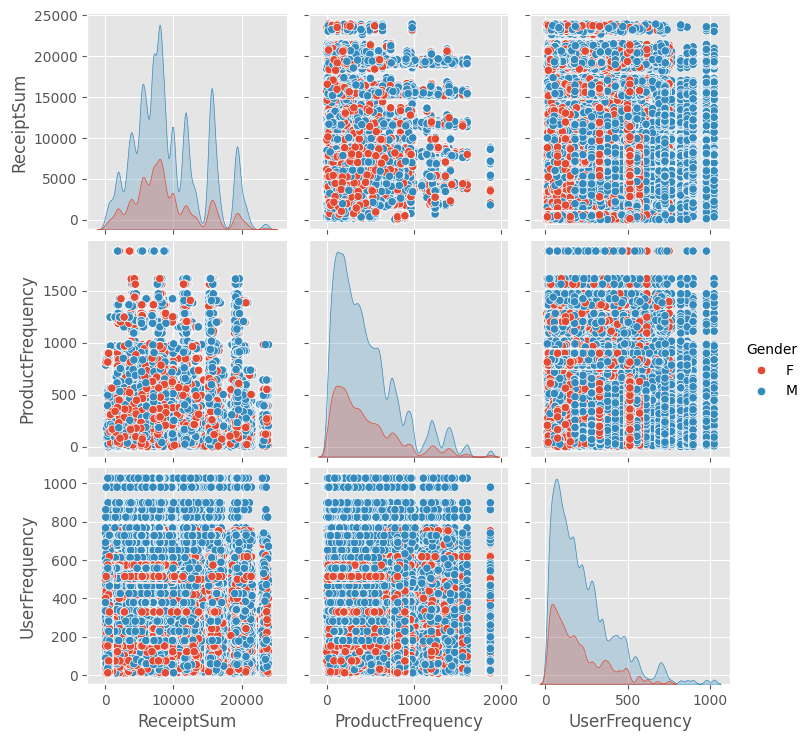

In [ ]:
sns.pairplot(df, vars=['ReceiptSum', 'ProductFrequency', 'UserFrequency'], hue='Gender')
plt.show()
